# Import necessary libraries.

In [3]:
import spacy
import textacy
import textacy.preprocessing
import textacy.resources
#import textacy.keyterms
import textacy.ke
#import neuralcoref
from spacy.symbols import ORTH, POS, NOUN, VERB,PRON
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from networkx.readwrite import json_graph;
import json
from afinn import Afinn
afn = Afinn()
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
lemmatizer = WordNetLemmatizer()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from allennlp_models.pretrained import load_predictor
predictor = load_predictor("roberta-sst")
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath('D:/github/causal-graph-acquisition/SentiStrengthCom.jar')
senti.setSentiStrengthLanguageFolderPath('D:/github/causal-graph-acquisition/SentStrength_Data_Sept2011/')
import pandas as pd
from IPython.display import display
import collections

from nltk.corpus import stopwords
set(stopwords.words('english'))


from pd_replicator import replicator

nlp = spacy.load("en_core_web_sm")
#neuralcoref.add_to_pipe(nlp)

import pysmile
pysmile.License((
	b"SMILE LICENSE c978699b 97c07af6 f69b7377 "
	b"THIS IS AN ACADEMIC LICENSE AND CAN BE USED "
	b"SOLELY FOR ACADEMIC RESEARCH AND TEACHING, "
	b"AS DEFINED IN THE BAYESFUSION ACADEMIC "
	b"SOFTWARE LICENSING AGREEMENT. "
	b"Serial #: damx5dd4ezqly012c37ko4l9i "
	b"Issued for: Solat Jabeen (solatjabeen@gmail.com) "
	b"Academic institution: Institute of Business Administration "
	b"Valid until: 2024-02-05 "
	b"Issued by BayesFusion activation server"
	),[
	0x73,0x67,0x28,0xba,0x6a,0x03,0x97,0x7f,0x5b,0x89,0x34,0xc7,0xc1,0x5a,0x5a,0xb3,
	0xec,0x9e,0x9e,0x6a,0x09,0xd5,0xc2,0x93,0xb4,0x57,0x24,0xc9,0x3d,0xf8,0x8d,0x25,
	0x96,0xbd,0x56,0xb8,0x3c,0xad,0x98,0x00,0xcb,0x27,0xa2,0x28,0x4b,0x1f,0x76,0xb1,
	0x92,0x1a,0x65,0x41,0xd6,0xbe,0x12,0xa3,0x4b,0x60,0x83,0x3f,0x57,0x1d,0xf7,0x23])

lerc is not a registered model.
Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Read text file and preprocess.

In [4]:
#from spacy.lang.en import English

file_name = './Text/Simplified Narrative.txt'
#file_name = 'input.txt'
narrative = open(file_name, encoding="utf8").read()

narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
#narrative = textacy.preprocessing.remove_punctuation(narrative, marks=",;:")
#narrative = textacy.preprocessing.normalize_whitespace(narrative)
#narrative = textacy.make_spacy_doc(narrative)
narrative = narrative.lower()
narrative = nlp(narrative)

#narrative._.coref_clusters
#narrative._.coref_resolved

# print('Original Narrative:')
# print(narrative)
# print('Extracted Coreferences:')
# print(narrative._.coref_clusters)
# print('\n')
# narrative = narrative._.coref_resolved
# print('Narrarive after resolving coreferences:')
# print(narrative)

raw_sentences = sent_tokenize(str(narrative))
#narrative = nlp(narrative)

print('\nSpacy Sentences:\n')
for sent in narrative.sents:
    print(sent.text)

print('\nNLTK Sentences:\n')
for sent in raw_sentences:
    print(sent)


Spacy Sentences:

enemies surround pakistan.
pakistan has faced existential threats.
zulfikar ali bhutto launched nuclear program.
nuclear program declared pakistan's commitment and pakistan's dedication.
aq khan developed nuclear bomb.
nuclear bomb strengthened pakistan.
pakistan became advanced and powerful muslim country.
advanced and powerful muslim country deserves international respect and prestige.
nuclear bomb makes nuclear power.
pakistan became nuclear power.
united states opposes pakistan's nuclear capability.
india opposes pakistan's nuclear capability.
pakistan must never surrender nuclear bomb.
pakistan must fight off existential threats.
pakistan must support army and aq khan.
army guards nuclear bomb.
aq khan gifted nuclear power.
army provides vigilance.
vigilance strengthened national survival.
nuclear bomb guarantees pakistan's continued existence.

NLTK Sentences:

enemies surround pakistan.
pakistan has faced existential threats.
zulfikar ali bhutto launched nucle

# Extract the Subject-Verb-Object triples.

In [5]:
#new
finalList = []
sentences = []
ncl = []
nncl = [()]
checkPass = False
rootCheck = False
varForm1 = False
varForm2 = False
sub = ''
obj = ''
#tuple =('a','b','c')

#print(tuple[0])

for sent in raw_sentences:
    sent = nlp(sent)
    print("Sentence:")
    print(sent)
    
    print("Noun Chunks:")
    for nc in sent.noun_chunks:
        print (nc)
        ncl.append(nc)
    print ("Number of noun chunks: ", len(ncl))
    
    triplets = textacy.extract.subject_verb_object_triples(sent)
    triplets = list(triplets)
    if len(triplets) > 0:
        print("Triples from textacy:")
        for t in triplets:
            subject = t[0]
            objec = t[2]
            for chunk in ncl:
                for cToken in chunk:
                    if str(cToken) == str(t[0]):
                        subject = chunk
                    if str(cToken) == str(t[2]):
                        objec = chunk
            tup = (subject,t[1],objec)
            print(tup)
            finalList.append(tup)
            sentences.append(sent)
        if len(ncl) == 3:
            nncl = [(ncl[0],triplets[0][1],ncl[1])]
            nncl.append((ncl[0],triplets[0][1],ncl[2]))
            print("Triples other than textacy:")
            print(nncl[0])
            print(nncl[1])
            finalList.append(nncl[0])
            sentences.append(sent)
            finalList.append(nncl[1])
            sentences.append(sent)
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],triplets[0][1],ncl[1])]
#            print("Triples other than textacy:")
#            print(nncl[0])
#            finalList.append(nncl[0])
    else:
        print("Method from textacy; subject_verb_object_triples extracted nothing!")
        for token in sent:
            #print(token.text, token.dep_,)
            if token.dep_ == 'nsubj':
                sub = token
                #tuple[0] = str(token.text)
            elif token.dep_ == 'nsubjpass':
                checkPass = True
                sub = token
            elif token.dep_ == 'ROOT':
                #print("Heyyyyyyy")
                verb = token
                #print(verb)
                rootCheck = True
            elif token.pos_ == 'NOUN' and token.dep_ == 'conj':
                if rootCheck is True:
                    varForm2 = True
                else:
                    varForm1 = True
                #tuple[1] = token.text
            #elif token.dep_ == 'dobj':
            #    obj = token.text
                #tuple[2] = token.text
            #    break
            else:
                if token.dep_ == 'dobj':
                    obj = token
                    continue
                elif token.dep_ == 'pobj':
                    obj = token
                    continue
                
        for nChunk in ncl:
            for nToken in nChunk:
                if str(nToken) == str(sub):
                    sub = nChunk
                if str(nToken) == str(obj):
                    obj = nChunk
        if checkPass is True:
            tuple = (obj,verb,sub)
        else:
            tuple = (sub,verb,obj)
        print("Triple by combining nsubj, root and dobj:")
        print(tuple)
        finalList.append(tuple)
        sentences.append(sent)
        if len(ncl) == 3:
            if varForm1 == True:
                nncl = [(ncl[0],verb,ncl[2])]
                nncl.append((ncl[1],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            else:
                nncl = [(ncl[0],verb,ncl[1])]
                nncl.append((ncl[0],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                sentences.append(sent)
                finalList.append(nncl[1])
                sentences.append(sent)
            
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],verb,ncl[1])]
#            print("Triples other than sub, verb and obj:")
#            print(nncl[0])
#            finalList.append(nncl[0])

    ncl.clear()
    nncl.clear()
    rootCheck = False
    checkPass = False
    varForm1 = False
    varForm2 = False
    
trips = finalList

#        for token in nc:
#            print(token.text, token.dep_)

Sentence:
enemies surround pakistan.
Noun Chunks:
enemies surround pakistan
Number of noun chunks:  1
Method from textacy; subject_verb_object_triples extracted nothing!
Triple by combining nsubj, root and dobj:
('', pakistan, '')
Sentence:
pakistan has faced existential threats.
Noun Chunks:
pakistan
existential threats
Number of noun chunks:  2
Triples from textacy:
(pakistan, has faced, existential threats)
Sentence:
zulfikar ali bhutto launched nuclear program.
Noun Chunks:
zulfikar ali bhutto
nuclear program
Number of noun chunks:  2
Triples from textacy:
(zulfikar ali bhutto, launched, nuclear program)
Sentence:
nuclear program declared pakistan's commitment and pakistan's dedication.
Noun Chunks:
nuclear program
pakistan's commitment
pakistan's dedication
Number of noun chunks:  3
Triples from textacy:
(nuclear program, declared, pakistan's commitment)
(nuclear program, declared, pakistan's dedication)
Triples other than textacy:
(nuclear program, declared, pakistan's commitment

# Remove Duplicates from Triples

In [6]:
#causeffect = list(dict.fromkeys(causeffect))

print("Length of triples' List before removing duplicates:")
print(len(trips))

Triples = []
sentences1 = []

for sentence,ce in zip(sentences, trips):
    check = False
    #print("ce:")
    #print(ce)
    if len(Triples) == 0:
        #print("HEY!")
        Triples.append(ce)
        sentences1.append(sentence)
        #print("added!")
    else:
        for ct in Triples:
            #print("ct:")
            #print(ct)
            if str(ce[0]) == str(ct[0]) and str(ce[1]) == str(ct[1]) and str(ce[2]) == str(ct[2]):
                #print("duplicate")
                check = True
                break;
        if check == False:
            Triples.append(ce)
            sentences1.append(sentence)
            #print("added!")

print("\nList after removing duplicates:")
print(len(Triples))

for t in Triples:
    print(t)

Length of triples' List before removing duplicates:
29

List after removing duplicates:
23
('', pakistan, '')
(pakistan, has faced, existential threats)
(zulfikar ali bhutto, launched, nuclear program)
(nuclear program, declared, pakistan's commitment)
(nuclear program, declared, pakistan's dedication)
(aq khan, developed, nuclear bomb)
(nuclear bomb, strengthened, pakistan)
(pakistan, became, advanced and powerful muslim country)
(advanced and powerful muslim country, deserves, international respect)
(advanced and powerful muslim country, deserves, prestige)
(nuclear bomb, makes, nuclear power)
(pakistan, became, nuclear power)
(united states, opposes, pakistan's nuclear capability)
(india, opposes, pakistan's nuclear capability)
(pakistan, must never surrender, nuclear bomb)
(pakistan, must fight, existential threats)
(pakistan, must support, army)
(pakistan, must support, aq khan)
(army, guards, nuclear bomb)
(aq khan, gifted, nuclear power)
(army, provides, vigilance)
(vigilance, s

# Filter correct triples from extracted triples

In [7]:
correctTriples = []
sentences2 = []

for sentence,line in zip(sentences1, Triples):
    taggedWords = []
    taggedWords1 = []
    check0 = False
    check2 = False
    print(line)
    taggedWords = pos_tag(word_tokenize(str(line[0])))
    taggedWords1 = pos_tag(word_tokenize(str(line[2])))
    print(taggedWords)
    print(taggedWords1)
    for i in range(len(taggedWords)):
        if taggedWords[i][1] == 'NN' or taggedWords[i][1] == 'NNS' or taggedWords[i][1] == 'VBG':
            check0 = True
    for i in range(len(taggedWords1)):
        if taggedWords1[i][1] == 'NN' or taggedWords1[i][1] == 'NNS' or taggedWords1[i][1] == 'VBG':
            check2 = True
    print(check0)  
    print(check2)
    if check0 == True and check2 == True:
        correctTriples.append(line)
        sentences2.append(sentence)
    print("**************************************************************************")
    
for correctTriple in correctTriples:
    print(correctTriple)

('', pakistan, '')
[]
[]
False
False
**************************************************************************
(pakistan, has faced, existential threats)
[('pakistan', 'NN')]
[('existential', 'JJ'), ('threats', 'NNS')]
True
True
**************************************************************************
(zulfikar ali bhutto, launched, nuclear program)
[('zulfikar', 'NN'), ('ali', 'NN'), ('bhutto', 'NN')]
[('nuclear', 'JJ'), ('program', 'NN')]
True
True
**************************************************************************
(nuclear program, declared, pakistan's commitment)
[('nuclear', 'JJ'), ('program', 'NN')]
[('pakistan', 'NN'), ("'s", 'POS'), ('commitment', 'NN')]
True
True
**************************************************************************
(nuclear program, declared, pakistan's dedication)
[('nuclear', 'JJ'), ('program', 'NN')]
[('pakistan', 'NN'), ("'s", 'POS'), ('dedication', 'NN')]
True
True
**************************************************************************
(a

# Print the extracted triples with sentences.

In [8]:
for sentence, triple  in zip(sentences2, correctTriples):
    print(sentence, triple)
    print()

pakistan has faced existential threats. (pakistan, has faced, existential threats)

zulfikar ali bhutto launched nuclear program. (zulfikar ali bhutto, launched, nuclear program)

nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's commitment)

nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's dedication)

aq khan developed nuclear bomb. (aq khan, developed, nuclear bomb)

nuclear bomb strengthened pakistan. (nuclear bomb, strengthened, pakistan)

pakistan became advanced and powerful muslim country. (pakistan, became, advanced and powerful muslim country)

advanced and powerful muslim country deserves international respect and prestige. (advanced and powerful muslim country, deserves, international respect)

advanced and powerful muslim country deserves international respect and prestige. (advanced and powerful muslim country, deserves, prestige)

nuclear bomb ma

# Reading causal trigger words dictionary from text file (dictionary.txt) to list 

In [9]:
synonyms = []

my_file = open(".\dictionary.txt", "r")
  
data = my_file.read()
  
synonyms = data.split("\n")
#print(data_into_list)
my_file.close()

print(len(synonyms))

3227


# Filter Causal triples along with their causal sentences from SVO triples based upon causal trigger words dictionary.

In [10]:
causeffect = [] #without duplicates
causalSentences = [] #with duplicates
#lem = []
lemma_function = WordNetLemmatizer()
for s,st in zip(sentences2,correctTriples):
    check = False
    #st = (str(st[0]),str(st[1]),str(st[2]))
    #synonym = synonym[0]
    tokens = word_tokenize(str(st[1]))
    for token, tag in pos_tag(tokens):
        lemma = lemma_function.lemmatize(token)
        #print(token,lemma)
        #st[1] = lemma
        #lem.append(lemma)
        
    for synonym in synonyms:
        if synonym == lemma:
            #causeffect = [(st[0],st[1],st[2])]
            #strTriples.append((ncl[0],token.text,st[2]))
           # print(st)
            if len(causeffect) == 0:
                causeffect.append(st)
                causalSentences.append(s)
            else:
                for ct in causeffect:
                    if str(st[0]) == str(ct[0]) and str(st[1]) == str(ct[1]) and str(st[2]) == str(ct[2]):
                        check = True
                        break;
                if check == False:
                    causeffect.append(st)
                    causalSentences.append(s)
            #if (len(causeffect) >0 ) and (st in causeffect == False):
                
            #    causeffect.append(st)
            break
    
#causeffect.sort(key = lambda x: x[0])

#for sortedTriple in causeffect:
#    print(sortedTriple)
print(len(causalSentences))
print(len(causeffect))
for causalSentence, causalTriple  in zip(causalSentences, causeffect):
    print(causalSentence, causalTriple)

14
14
zulfikar ali bhutto launched nuclear program. (zulfikar ali bhutto, launched, nuclear program)
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's commitment)
nuclear program declared pakistan's commitment and pakistan's dedication. (nuclear program, declared, pakistan's dedication)
aq khan developed nuclear bomb. (aq khan, developed, nuclear bomb)
nuclear bomb strengthened pakistan. (nuclear bomb, strengthened, pakistan)
nuclear bomb makes nuclear power. (nuclear bomb, makes, nuclear power)
pakistan must never surrender nuclear bomb. (pakistan, must never surrender, nuclear bomb)
pakistan must fight off existential threats. (pakistan, must fight, existential threats)
pakistan must support army and aq khan. (pakistan, must support, army)
pakistan must support army and aq khan. (pakistan, must support, aq khan)
army guards nuclear bomb. (army, guards, nuclear bomb)
army provides vigilance. (army, provides, vigilance)
vig

# Plot the Causal Graph.

Nodes: 13
Edges: 11
zulfikar ali bhutto , {'predicade': 'launched'} , nuclear program
nuclear program , {'predicade': 'declared'} , pakistan's commitment
nuclear program , {'predicade': 'declared'} , pakistan's dedication
aq khan , {'predicade': 'developed'} , nuclear bomb
nuclear bomb , {'predicade': 'strengthened'} , pakistan
nuclear bomb , {'predicade': 'makes'} , nuclear power
nuclear bomb , {'predicade': 'guarantees'} , pakistan's continued existence
pakistan , {'predicade': 'must fight'} , existential threats
pakistan , {'predicade': 'must support'} , army
army , {'predicade': 'provides'} , vigilance
vigilance , {'predicade': 'strengthened'} , national survival


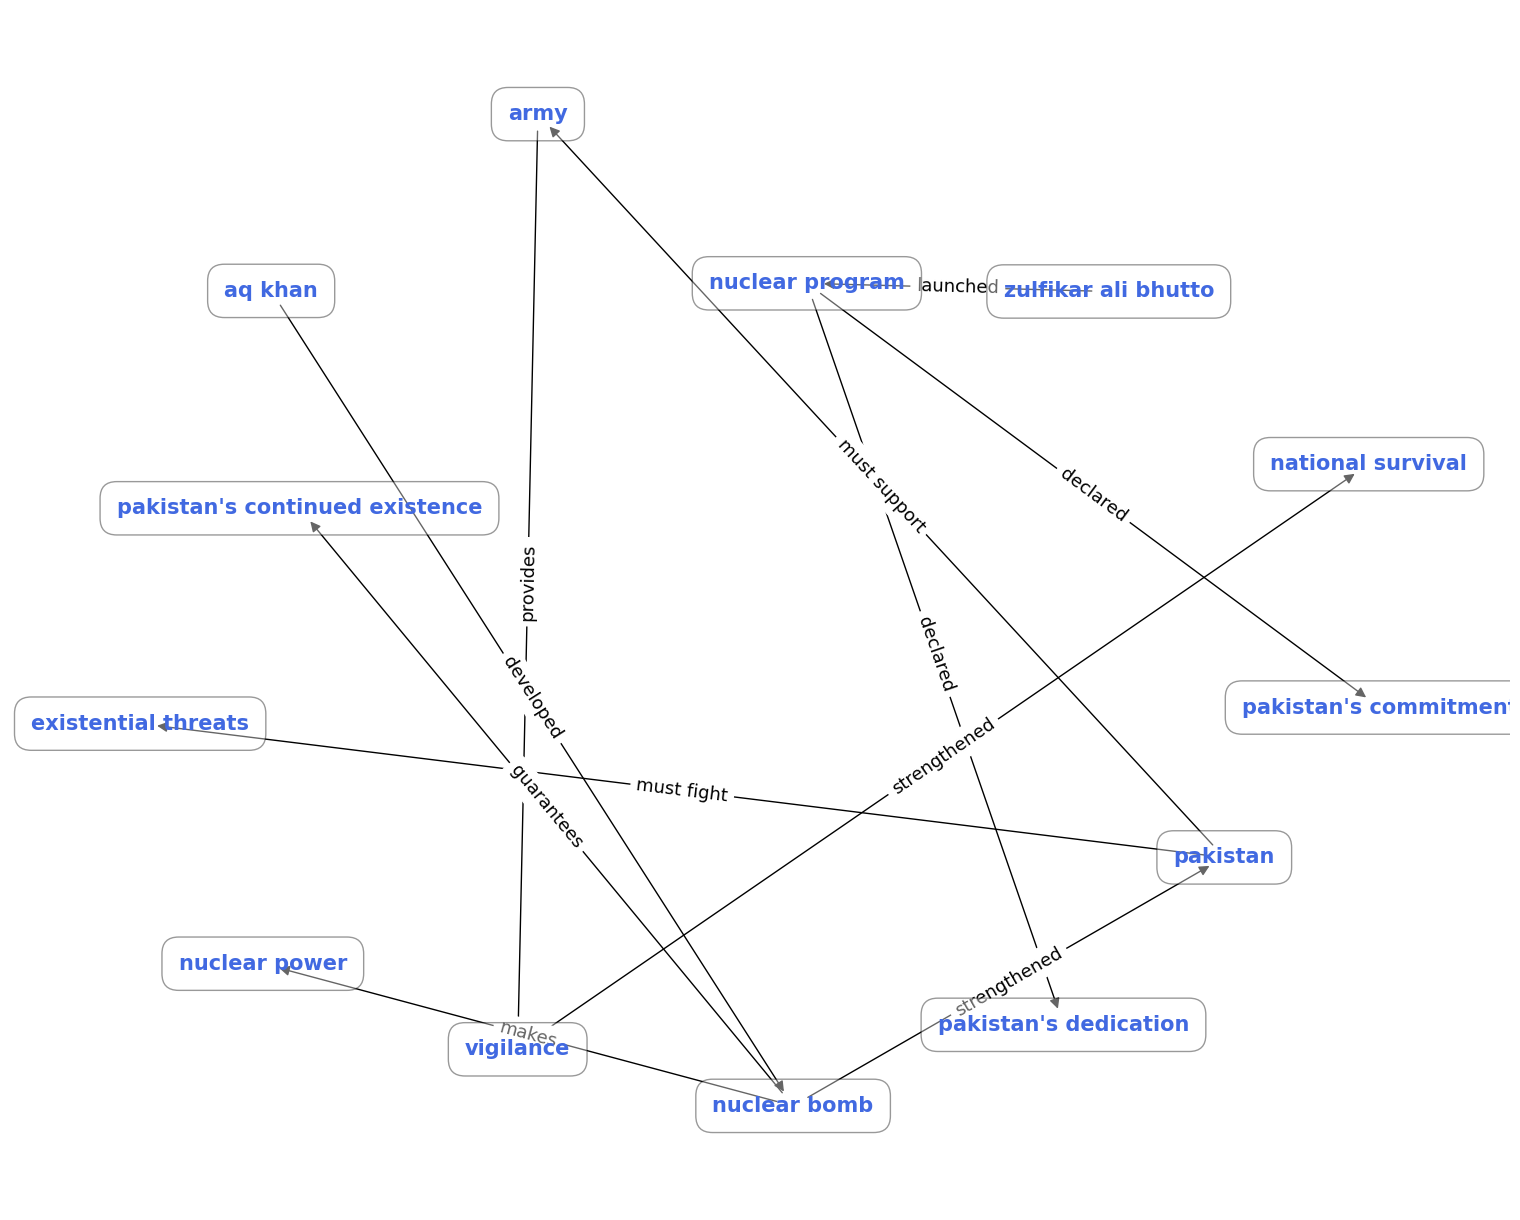

In [11]:
#new (DAG Implementation)
#without duplicates
dagCauseTriples = []
cg = nx.DiGraph()

for ce in causeffect:
    s = str(ce[0])    
    d = str(ce[2])
    #cg.add_node(s,id = str(s),title=str(s),x=615,y=200) #for d3js
    cg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    #cg.add_node(d,id = str(d),title=str(d),x=615,y=200) #for d3js
    cg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cg.add_edge(s, d, predicade=str(ce[1]))
    dagCauseTriples.append(ce)
    if nx.is_directed_acyclic_graph(cg) is False:
        cg.remove_edge(s, d)
        dagCauseTriples.remove(ce)
        

print("Nodes:",len(cg.nodes))
print("Edges:",len(cg.edges))
for e in cg.edges(data=True):
    print(e[0],",",e[2],",",e[1])

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Make Causal Graph Fully Connected (Change value of 'ce' tuple)

Nodes: 13
Edges: 12
zulfikar ali bhutto , {'predicade': 'launched'} , nuclear program
nuclear program , {'predicade': 'declared'} , pakistan's commitment
nuclear program , {'predicade': 'declared'} , pakistan's dedication
nuclear program , {'predicade': 'developed'} , nuclear bomb
aq khan , {'predicade': 'developed'} , nuclear bomb
nuclear bomb , {'predicade': 'strengthened'} , pakistan
nuclear bomb , {'predicade': 'makes'} , nuclear power
nuclear bomb , {'predicade': 'guarantees'} , pakistan's continued existence
pakistan , {'predicade': 'must fight'} , existential threats
pakistan , {'predicade': 'must support'} , army
army , {'predicade': 'provides'} , vigilance
vigilance , {'predicade': 'strengthened'} , national survival


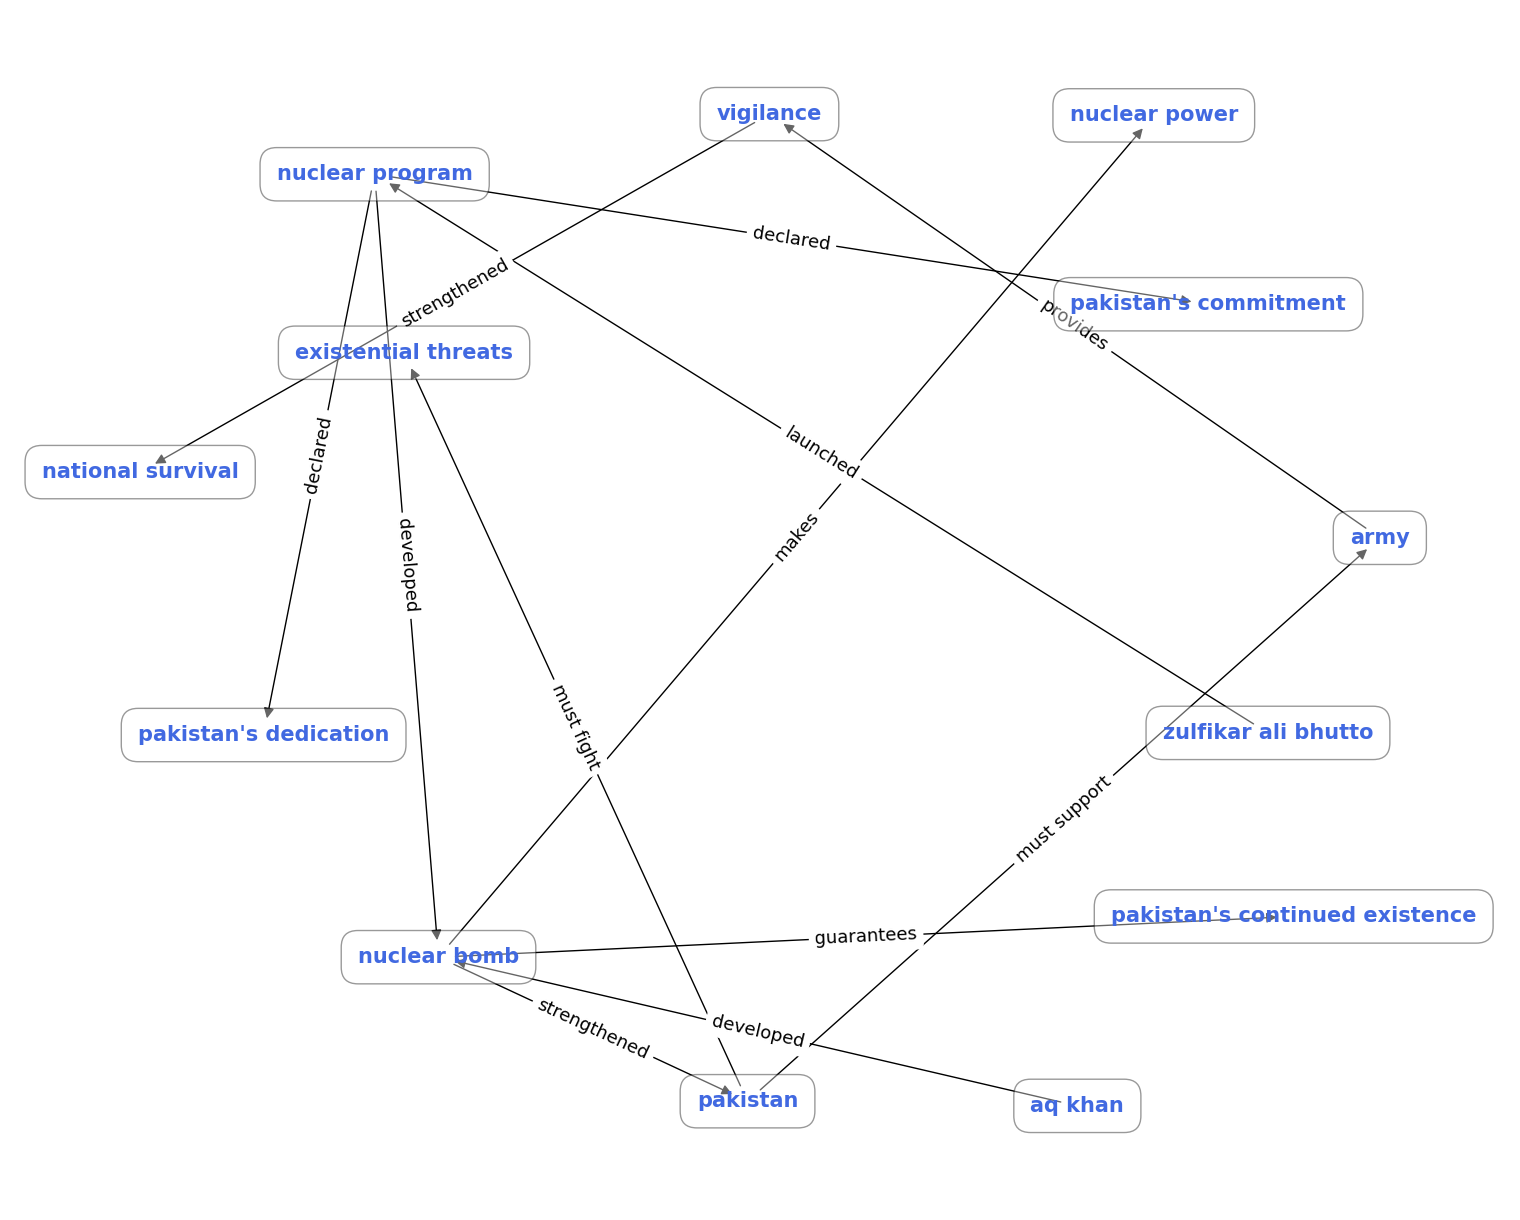

In [12]:
ce = ("nuclear program","developed","nuclear bomb")
cg.add_edge(ce[0], ce[2], predicade=ce[1])
dagCauseTriples.append(ce)
if nx.is_directed_acyclic_graph(cg) is False:
    cg.remove_edge(ce[0], ce[2])
    dagCauseTriples.remove(ce)
else:
    print("Nodes:",len(cg.nodes))
    print("Edges:",len(cg.edges))
    for e in cg.edges(data=True):
        print(e[0],",",e[2],",",e[1])

    pos = nx.spring_layout(cg, k=4, iterations=20)
    plt.figure(figsize=(15,12))

    nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
    edge_labels = nx.get_edge_attributes(cg,'predicade')
    nx.draw_networkx_edge_labels(cg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

    plt.axis('off')
    plt.show()

# Remove Duplicates from Causal Triples

In [13]:
#causeffect = list(dict.fromkeys(causeffect))

print("List before removing duplicates:")
print(len(causeffect))

#for t in causeffect:
#    print(t)
    
causalTriples = []

for ce in causeffect:
    check = False
    #print("ce:")
    #print(ce)
    if len(causalTriples) == 0:
        #print("HEY!")
        causalTriples.append(ce)
        #print("added!")
    else:
        for ct in causalTriples:
            #print("ct:")
            #print(ct)
            if str(ce[0]) == str(ct[0]) and str(ce[1]) == str(ct[1]) and str(ce[2]) == str(ct[2]):
                #print("duplicate")
                check = True
                break;
        if check == False:
            causalTriples.append(ce)
            #print("added!")

print("\nList after removing duplicates:")
print(len(causalTriples))

#for t in causalTriples:
#    print(t)

List before removing duplicates:
14

List after removing duplicates:
14


# Remove Duplicates from causalSentences

In [14]:
#causalSentences = list(dict.fromkeys(causalSentences))
#causalSentences = list(set(causalSentences))
print("List before removing duplicates:")
print(len(causalSentences))

#for t in causalSentences:
#    print(t)
    
causalSentencesNoDup = []

for ce in causalSentences:
    check = False
    #print("ce:")
    #print(ce)
    if len(causalSentencesNoDup) == 0:
        #print("HEY!")
        causalSentencesNoDup.append(ce)
        #print("added!")
    else:
        for ct in causalSentencesNoDup:
            #print("ct:")
            #print(ct)
            if str(ce) == str(ct):
                #print("duplicate")
                check = True
                break;
        if check == False:
            causalSentencesNoDup.append(ce)
            #print("added!")

print("\nList after removing duplicates:")
print(len(causalSentencesNoDup))

#for t in causalSentencesNoDup:
#    print(t)

List before removing duplicates:
14

List after removing duplicates:
12


# Causal Triples' Polarity (Whole) 

### [AllenNlp] 

In [15]:
#https://demo.allennlp.org/sentiment-analysis/roberta-sentiment-analysis
#https://paperswithcode.com/model/roberta-large-sst

#output (Pos,neg)

#sentence = "Enemies surround Pakistan."
#preds = predictor.predict(sentence)
#print(f"p(positive)={preds['probs'][0]:.2%}")
allen = []
for sent in dagCauseTriples:
    #print(sent)
    preds = predictor.predict(str(sent))
    #print(preds['label'][0])
    label = preds['label'][0]
    if label is '0':
        allen.append(-1)
    else:
        allen.append(1)
    
for causalSentence, polarity  in zip(dagCauseTriples, allen):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) -1
(nuclear program, declared, pakistan's commitment) 1
(nuclear program, declared, pakistan's dedication) 1
(aq khan, developed, nuclear bomb) -1
(nuclear bomb, strengthened, pakistan) -1
(nuclear bomb, makes, nuclear power) 1
(pakistan, must fight, existential threats) -1
(pakistan, must support, army) 1
(army, provides, vigilance) 1
(vigilance, strengthened, national survival) 1
(nuclear bomb, guarantees, pakistan's continued existence) 1
('nuclear program', 'developed', 'nuclear bomb') -1


### [Afinn]

In [16]:
#https://www.geeksforgeeks.org/python-sentiment-analysis-using-affin/

#output (Pos,neg,neural)

afinn = []
for sent in dagCauseTriples:
    #print(str(sent))
    score = afn.score(str(sent))
    #print(score)
    if score > 0:
        #print('positive')
        afinn.append(1)
    elif score < 0:
        #print('negative')
        afinn.append(-1)
    else:
        #print('neutral')
        afinn.append(0)
        
for causalSentence, polarity  in zip(dagCauseTriples, afinn):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) 1
(nuclear program, declared, pakistan's commitment) 1
(nuclear program, declared, pakistan's dedication) 1
(aq khan, developed, nuclear bomb) -1
(nuclear bomb, strengthened, pakistan) 1
(nuclear bomb, makes, nuclear power) -1
(pakistan, must fight, existential threats) -1
(pakistan, must support, army) 1
(army, provides, vigilance) 0
(vigilance, strengthened, national survival) 1
(nuclear bomb, guarantees, pakistan's continued existence) -1
('nuclear program', 'developed', 'nuclear bomb') -1


### [Vader]

In [17]:
#https://github.com/cjhutto/vaderSentiment#about-the-scoring
#output (Pos,neg,neural)

vader = []

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    #print(vs)
    return vs['compound']

def vader_analysis(compound):
    if compound >= 0.05:
        vader.append(1)
        return 'Positive'
    elif compound <= -0.05 :
        vader.append(-1)
        return 'Negative'
        
    elif  compound > -0.05 and compound < 0.05:
        vader.append(0)
        return 'Neutral'
    
for sent in dagCauseTriples:
    #print(sent)
    compound = vadersentimentanalysis(str(sent))
    vader_analysis(compound)
    
for causalSentence, polarity  in zip(dagCauseTriples, vader):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) 1
(nuclear program, declared, pakistan's commitment) 1
(nuclear program, declared, pakistan's dedication) 0
(aq khan, developed, nuclear bomb) -1
(nuclear bomb, strengthened, pakistan) -1
(nuclear bomb, makes, nuclear power) -1
(pakistan, must fight, existential threats) -1
(pakistan, must support, army) 1
(army, provides, vigilance) 0
(vigilance, strengthened, national survival) 1
(nuclear bomb, guarantees, pakistan's continued existence) -1
('nuclear program', 'developed', 'nuclear bomb') -1


### [SentiStrength]

In [18]:
#http://sentistrength.wlv.ac.uk/
#http://paper.ijcsns.org/07_book/202001/20200107.pdf
#https://pypi.org/project/sentistrength/
#http://sentistrength.wlv.ac.uk/results.php?text=pakistan+must+support+army+and+aq+khan.&submit=Detect+Sentiment&result=trinary
#https://professorkhan.com/2019/03/29/sentiment-analysis-with-sentistrength/
#output (Pos,neg)

sentiStrength = []

for sent in dagCauseTriples:
    #print(sent)
    result = senti.getSentiment(str(sent), score='binary')
    #print(result)
    
    if result[0]==1:
        #print('Positive')
        sentiStrength.append(1)
    elif result[0]==-1:
        sentiStrength.append(-1)
        #print('Negative')
    #else:
    #    print('Neutral')

for causalSentence, polarity  in zip(dagCauseTriples, sentiStrength):
    print(causalSentence, polarity)

(zulfikar ali bhutto, launched, nuclear program) 1
(nuclear program, declared, pakistan's commitment) 1
(nuclear program, declared, pakistan's dedication) 1
(aq khan, developed, nuclear bomb) -1
(nuclear bomb, strengthened, pakistan) -1
(nuclear bomb, makes, nuclear power) -1
(pakistan, must fight, existential threats) -1
(pakistan, must support, army) 1
(army, provides, vigilance) 1
(vigilance, strengthened, national survival) 1
(nuclear bomb, guarantees, pakistan's continued existence) -1
('nuclear program', 'developed', 'nuclear bomb') -1


### Data Frame (Causal Triples Whole)

In [19]:
#df2 = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, 0,0],[19, 439, 6, 452, 226,232,0]],columns=['Causal Sentence','AllenNlp','Afinn','Vader','SentiStrength','Weight','Polarity'])

df2 = pd.DataFrame(list(zip(dagCauseTriples, allen, afinn, vader,sentiStrength)), columns =['Causal Triple', 'AllenNLP','Afinn','Vader','SentiStrength'])
df2["Weight"] = df2.sum(axis=1)

sentPolarity = []
triplesWeight_sentLevel = []

for index, row in df2.iterrows():
    tripleWeightTuple = []
    weight = row['Weight']
    tripleWeightTuple.append(weight)
    triplesWeight_sentLevel.append(tripleWeightTuple)
    #print(weight)
    if weight is -4:
        sentPolarity.append('Strong Negative') 
        #print('Strong Negative')
    elif weight is -3:
        sentPolarity.append('Moderate Negative')
        #print('Moderate Negative')
    elif weight is -2:
        sentPolarity.append('Mild Negative')
        #print('Mild Negative')
    elif weight is -1:
        sentPolarity.append('Weak Negative')
        #print('Weak Negative')
    elif weight is 0:
        sentPolarity.append('Neutral')
        #print('Neutral')
    elif weight is 4:
        sentPolarity.append('Strong Positive')
        #print('Strong Positive')
    elif weight is 3:
        sentPolarity.append('Moderate Positive')
        #print('Moderate Positive')
    elif weight is 2:
        sentPolarity.append('Mild Positive')
        #print('Mild Positive')
    elif weight is 1:
        sentPolarity.append('Weak Positive')
        #print('Weak Positive')

df2["Polarity"] = sentPolarity
df2.style

c:\Users\sjsheikh\Anaconda3\envs\Second\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,Causal Triple,AllenNLP,Afinn,Vader,SentiStrength,Weight,Polarity
0,"(zulfikar ali bhutto, launched, nuclear program)",-1,1,1,1,2,Mild Positive
1,"(nuclear program, declared, pakistan's commitment)",1,1,1,1,4,Strong Positive
2,"(nuclear program, declared, pakistan's dedication)",1,1,0,1,3,Moderate Positive
3,"(aq khan, developed, nuclear bomb)",-1,-1,-1,-1,-4,Strong Negative
4,"(nuclear bomb, strengthened, pakistan)",-1,1,-1,-1,-2,Mild Negative
5,"(nuclear bomb, makes, nuclear power)",1,-1,-1,-1,-2,Mild Negative
6,"(pakistan, must fight, existential threats)",-1,-1,-1,-1,-4,Strong Negative
7,"(pakistan, must support, army)",1,1,1,1,4,Strong Positive
8,"(army, provides, vigilance)",1,0,0,1,2,Mild Positive
9,"(vigilance, strengthened, national survival)",1,1,1,1,4,Strong Positive


# Plot the Polarized/Weighted Causal Graph.

Nodes: 13
Edges: 12
zulfikar ali bhutto , {'predicate': 'launched', 'polarity': 'Mild Positive', 'weight': 0.5} , nuclear program
nuclear program , {'predicate': 'declared', 'polarity': 'Strong Positive', 'weight': 1.0} , pakistan's commitment
nuclear program , {'predicate': 'declared', 'polarity': 'Moderate Positive', 'weight': 0.75} , pakistan's dedication
nuclear program , {'predicate': 'developed', 'polarity': 'Strong Negative', 'weight': -1.0} , nuclear bomb
aq khan , {'predicate': 'developed', 'polarity': 'Strong Negative', 'weight': -1.0} , nuclear bomb
nuclear bomb , {'predicate': 'strengthened', 'polarity': 'Mild Negative', 'weight': -0.5} , pakistan
nuclear bomb , {'predicate': 'makes', 'polarity': 'Mild Negative', 'weight': -0.5} , nuclear power
nuclear bomb , {'predicate': 'guarantees', 'polarity': 'Mild Negative', 'weight': -0.5} , pakistan's continued existence
pakistan , {'predicate': 'must fight', 'polarity': 'Strong Negative', 'weight': -1.0} , existential threats
paki

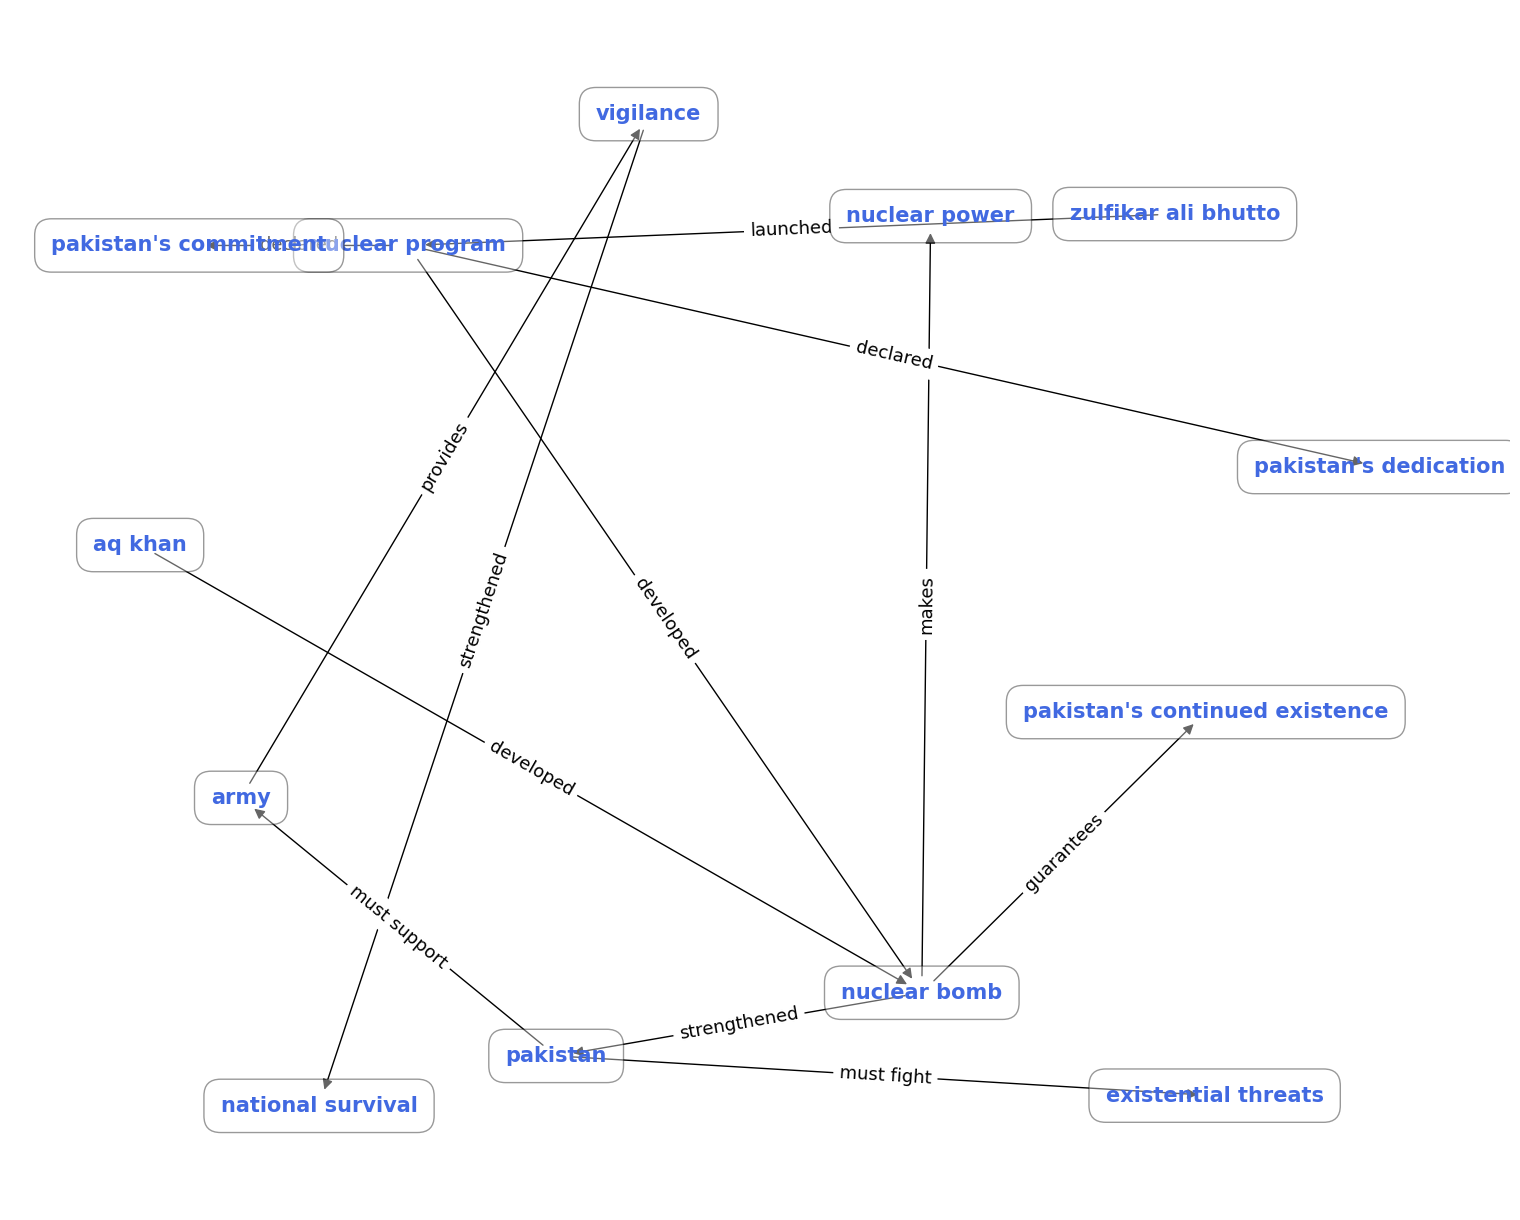

In [20]:
weights = df2["Weight"].tolist()
polarities = df2["Polarity"].tolist()
cwg = nx.DiGraph()

for ce,p,w in zip(dagCauseTriples, polarities,weights):
    s = str(ce[0])    
    d = str(ce[2])
    w = w/4
    cwg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    cwg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cwg.add_edge(s, d, predicate=str(ce[1]), polarity = p, weight = w)
    
print("Nodes:",len(cwg.nodes))
print("Edges:",len(cwg.edges))
for e in cwg.edges(data=True):
    print(e[0],",",e[2],",",e[1])
    #for nbr, eattr in e[2].items():
    #    if nbr == "weight":
    #        print(eattr)

pos = nx.spring_layout(cwg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cwg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cwg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cwg,'predicate')
#edge_labels2 = nx.get_edge_attributes(cwg,'polarity')
#edge_labels3 = nx.get_edge_attributes(cwg,'weight')

nx.draw_networkx_edge_labels(cwg, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Plot the Polarized Causal Graph on using Pyvis "Polarized Causal Graph.html" file

In [21]:
nt = Network("660px", "1515px", notebook=True,directed=True, bgcolor='#ffffff', font_color='black', layout=None, heading='Polarized Causal Graph')

for dm,p,w in zip(dagCauseTriples, polarities,weights):
    #color = "#ffffff"
    nt.add_node(str(dm[0]),shape = 'box',physics='false',color = "#ffffff")
    nt.add_node(str(dm[2]),shape = 'box',physics='false',color = "#ffffff")
    w=w/4
    nt.add_edge(str(dm[0]),str(dm[2]),label=str(dm[1]) + " ("+str(p)+" "+str(w)+")", weight=10, physics='false',color='black')

#nt.show_buttons(filter_=['physics'])
nt.set_edge_smooth('discrete')
nt.show("./Pyvis Graph/Polarized Causal Graph.html")

# Compute CPs using CAST Logic

In [50]:
class Tutorial1:
    #def __init__(self):
    def Add(self, net, id ,name, outcomes, x_pos, y_pos):
        e = self.create_cpt_node(net, id, name, outcomes, x_pos, y_pos)
        #net.add_arc("Economy", "Forecast");
        #net.add_arc("Node0", "Node1");
        #nodeHandles.append(self.create_cpt_node(net, id, name, outcomes, x_pos, y_pos))
        nodeNames.append(net.get_node_name(e))
        nodeIds.append(net.get_node_id(e))
        nodeHandles.append(e)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def AddArcs(self, net, s, d):
        net.add_arc(s, d)
        net.write_file("./GeNie CBN/CBN.xdsl")

    def Addcpts(self, net, h, cpt):
        net. set_node_definition(h, cpt)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def create_cpt_node(self, net, id, name, outcomes, x_pos, y_pos):
        handle = net.add_node(pysmile.NodeType.CPT, id)
        net.set_node_name(handle, name)
        net.set_node_position(handle, x_pos, y_pos, 85, 55)
        initial_outcome_count = net.get_outcome_count(handle)
        for i in range(0, initial_outcome_count):
            net.set_outcome_id(handle, i, outcomes[i])
        for i in range(initial_outcome_count, len(outcomes)):
            net.add_outcome(handle, outcomes[i])
        return handle
    
    def print_cpt_matrix(self, net, node_handle):
        cpt = net.get_node_definition(node_handle)
        return cpt
    

net = pysmile.Network()
obj = Tutorial1()
outcomes = ["False","True"]
nodeNames = []    
nodeIds = []
nodeHandles = []
cpts=[]
baseline = 0.1
x = 160
y = 40

for node in cwg.nodes: 
    obj.Add(net, str(node),str(node), outcomes, x, y)
    #x = x + 100
    #y = y + 100
        
for e in cwg.edges():
    for id,name in zip(nodeIds,nodeNames):
        if name == e[0]:
            s = id
        if name == e[1]:
            d = id 
    obj.AddArcs(net, s, d)
    
for handle,name in zip(nodeHandles,nodeNames): 
    print("Handle:" + str(handle))
    print("Node:" + name)
    print(net.get_outcome_ids(handle))
    parent_ids = net.get_parent_ids(handle)
    num_parents = len(parent_ids)
    print("Number of Parents:" + str(num_parents))
    cpt = []
    parent_names = []
    totalCols = 1
    if num_parents == 0:
        cpt.append(baseline)
        cpt.append(1 - baseline)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")
    elif num_parents > 0:
        for par in parent_ids:
                parent_names.append(net.get_node_name(par))
                #totalCols = totalCols * (num_parents * 2)
                totalCols = 2 ** num_parents
                #totalCols = totalCols + totalCols
        print("Names of Parents:" + str(parent_names))
        print("totalCols:" + str(totalCols))
        for j in range(0, totalCols):
            PI = 1
            NI = 1
            for parent in parent_names:
                print("Parent:" + parent)
                for edge in cwg.edges(data=True):
                    if str(parent) == str(edge[0]) and str(name) == str(edge[1]):
                        for nbr, eattr in edge[2].items():
                            if nbr == "polarity":
                                #print(eattr)
                                #polarities.append(eattr)
                                polarity = detect(eattr)
                                print("Polarity: " + str(polarity))
                        break
                ans = dummy(j,num_parents)
                
                #print(ans)
                if polarity >= 0:
                    #polarity = polarity/4
                    PI = PI * (1 - polarity)
                else:
                    #polarity = polarity/ (-4)
                    NI = NI * (1 - abs(polarity))
            PI = 1 - PI
            NI = 1 - NI
            AI = abs(PI - NI) / (1 - min(PI, NI))  
            CP = 0
            if PI > NI:
                CP = baseline + ((1 - baseline) * AI)
            elif PI < NI:
                CP = baseline - (baseline * AI)
            elif PI == NI:
                CP = baseline
            cpt.append(round(CP, 3))
            cpt.append(round((1 - CP), 3))
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")

Handle:0
Node:zulfikar ali bhutto
['False', 'True']
Number of Parents:0
CPT:[0.1, 0.9]
CPT from Network:
[0.1, 0.9]
********************************************************************
Handle:1
Node:nuclear program
['False', 'True']
Number of Parents:1
Names of Parents:['zulfikar ali bhutto']
totalCols:2
Parent:zulfikar ali bhutto
Polarity: 0.6
0
Parent:zulfikar ali bhutto
Polarity: 0.6
1
CPT:[0.64, 0.36, 0.64, 0.36]
CPT from Network:
[0.64, 0.36, 0.64, 0.36]
********************************************************************
Handle:2
Node:pakistan's commitment
['False', 'True']
Number of Parents:1
Names of Parents:['nuclear program']
totalCols:2
Parent:nuclear program
Polarity: 0.9
0
Parent:nuclear program
Polarity: 0.9
1
CPT:[0.91, 0.09, 0.91, 0.09]
CPT from Network:
[0.91, 0.09, 0.91, 0.09]
********************************************************************
Handle:3
Node:pakistan's dedication
['False', 'True']
Number of Parents:1
Names of Parents:['nuclear program']
totalCols:2
Pa

In [139]:
#NEW
class Tutorial1:
    #def __init__(self):
    def Add(self, net, id ,name, outcomes, x_pos, y_pos):
        e = self.create_cpt_node(net, id, name, outcomes, x_pos, y_pos)
        #net.add_arc("Economy", "Forecast");
        #net.add_arc("Node0", "Node1");
        #nodeHandles.append(self.create_cpt_node(net, id, name, outcomes, x_pos, y_pos))
        nodeNames.append(net.get_node_name(e))
        nodeIds.append(net.get_node_id(e))
        nodeHandles.append(e)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def AddArcs(self, net, s, d):
        net.add_arc(s, d)
        net.write_file("./GeNie CBN/CBN.xdsl")

    def Addcpts(self, net, h, cpt):
        net. set_node_definition(h, cpt)
        net.write_file("./GeNie CBN/CBN.xdsl")
        
    def create_cpt_node(self, net, id, name, outcomes, x_pos, y_pos):
        handle = net.add_node(pysmile.NodeType.CPT, id)
        net.set_node_name(handle, name)
        net.set_node_position(handle, x_pos, y_pos, 85, 55)
        initial_outcome_count = net.get_outcome_count(handle)
        for i in range(0, initial_outcome_count):
            net.set_outcome_id(handle, i, outcomes[i])
        for i in range(initial_outcome_count, len(outcomes)):
            net.add_outcome(handle, outcomes[i])
        return handle
    
    def print_cpt_matrix(self, net, node_handle):
        cpt = net.get_node_definition(node_handle)
        return cpt
    

net = pysmile.Network()
obj = Tutorial1()
outcomes = ["True","False"]
nodeNames = []    
nodeIds = []
nodeHandles = []
cpts=[]
baseline = 0.1
x = 160
y = 40

for node in cwg.nodes: 
    obj.Add(net, str(node),str(node), outcomes, x, y)
    #x = x + 100
    #y = y + 100
        
for e in cwg.edges():
    for id,name in zip(nodeIds,nodeNames):
        if name == e[0]:
            s = id
        if name == e[1]:
            d = id 
    obj.AddArcs(net, s, d)
    
for handle,name in zip(nodeHandles,nodeNames): 
    print("Handle:" + str(handle))
    print("Node:" + name)
    print(net.get_outcome_ids(handle))
    parent_ids = net.get_parent_ids(handle)
    num_parents = len(parent_ids)
    print("Number of Parents:" + str(num_parents))
    cpt = []
    parent_names = []
    totalCols = 1
    if num_parents == 0:
        cpt.append(baseline)
        cpt.append(1 - baseline)
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")
    elif num_parents > 0:
        for par in parent_ids:
                parent_names.append(net.get_node_name(par))
                #totalCols = totalCols * (num_parents * 2)
                totalCols = 2 ** num_parents
                #totalCols = totalCols + totalCols
        print("Names of Parents:" + str(parent_names))
        print("totalCols:" + str(totalCols))
        for j in range(0, totalCols):
            print("j: "+str(j))
            PI = 1
            NI = 1
            ans = FromTruthTable(j,num_parents)
            print("From Dummy: "+str(ans))
            #for parent in parent_names:
            for p in range(0,len(parent_names)):
                for edge in cwg.edges(data=True):
                    if str(parent_names[p]) == str(edge[0]) and str(name) == str(edge[1]):
                        for nbr, eattr in edge[2].items():
                            if nbr == "polarity":
                                #print(eattr)
                                #polarities.append(eattr)
                                polarity = GetCAstLogicStrength(eattr)
                        break
                print("Parent: " + parent_names[p])
                print("Polarity: " + str(polarity))
                print("p: "+str(p))
                if num_parents > 1:
                    if ans[p] == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                else:
                    if ans == 0:
                        polarity = 0
                        print("New Polarity: " + str(polarity))
                if polarity >= 0:
                    #polarity = polarity/4
                    PI = PI * (1 - polarity)
                else:
                    #polarity = polarity/ (-4)
                    NI = NI * (1 - abs(polarity))
            PI = 1 - PI
            NI = 1 - NI
            AI = abs(PI - NI) / (1 - min(PI, NI))  
            CP = 0
            if PI > NI:
                CP = baseline + ((1 - baseline) * AI)
            elif PI < NI:
                CP = baseline - (baseline * AI)
            elif PI == NI:
                CP = baseline
            cpt.append(round(CP, 3))
            cpt.append(round((1 - CP), 3))
        print("CPT:" + str(cpt))
        obj.Addcpts(net, handle, cpt)
        print("CPT from Network:")
        print(obj.print_cpt_matrix(net, handle))
        print("********************************************************************")

Handle:0
Node:zulfikar ali bhutto
['True', 'False']
Number of Parents:0
CPT:[0.1, 0.9]
CPT from Network:
[0.1, 0.9]
********************************************************************
Handle:1
Node:nuclear program
['True', 'False']
Number of Parents:1
Names of Parents:['zulfikar ali bhutto']
totalCols:2
j: 0
From Dummy: 1
Parent: zulfikar ali bhutto
Polarity: 0.6
p: 0
j: 1
From Dummy: 0
Parent: zulfikar ali bhutto
Polarity: 0.6
p: 0
New Polarity: 0
CPT:[0.64, 0.36, 0.1, 0.9]
CPT from Network:
[0.64, 0.36, 0.1, 0.9]
********************************************************************
Handle:2
Node:pakistan's commitment
['True', 'False']
Number of Parents:1
Names of Parents:['nuclear program']
totalCols:2
j: 0
From Dummy: 1
Parent: nuclear program
Polarity: 0.9
p: 0
j: 1
From Dummy: 0
Parent: nuclear program
Polarity: 0.9
p: 0
New Polarity: 0
CPT:[0.91, 0.09, 0.1, 0.9]
CPT from Network:
[0.91, 0.09, 0.1, 0.9]
********************************************************************
Handle:3


In [18]:
def FromTruthTable(i,inputs):
    count = 0

    # if inputs==1:
    #     for a in range(0,2):
    #         if i == a:
    #            return (a)

    if inputs==1:
        for a in range(1, -1, -1):
            if i == count:
               return (a)
            count = count+1
                
    # if inputs==2:
    #     for a in range(0,2):
    #         for b in range(0,2):
    #             if i == count:
    #                 t = (a,b)
    #                 return t
    #             count = count+1

    if inputs==2:
        for a in range(1, -1, -1):
            for b in range(1, -1, -1):
                if i == count:
                    t = (a,b)
                    return t
                count = count+1
        
    elif inputs==3:
        for a in range(1, -1, -1):
           for b in range(1, -1, -1):
              for c in range(1, -1, -1):
                 if i == count:
                     t = (a,b,c)
                     return t
                 count = count+1
    
    elif inputs==4:
        for a in range(1, -1, -1):
           for b in range(1, -1, -1):
              for c in range(1, -1, -1):
                 for d in range(1, -1, -1):
                    if i == count:
                        t = (a,b,c,d)
                        return t
                    count = count+1

In [24]:
print(FromTruthTable(0,4))

(1, 1, 1, 1)


In [25]:
def GetCAstLogicStrength(polarity):
    if polarity == "Strong Negative":
        return -0.9
    elif polarity == "Moderate Negative":
        return -0.6
    elif polarity == "Mild Negative":
        return -0.6
    elif polarity == "Weak Negative":
        return -0.3
    elif polarity == "Neutral":
        return 0.1
    elif polarity == "Weak Positive":
        return 0.3
    elif polarity == "Mild Positive":
        return 0.6
    elif polarity == "Moderate Positive":
        return 0.6
    elif polarity == "Strong Positive":
        return 0.9